### pybel_graph_EDA
This is a notebook to explore using pybel and pybel-tools packages to explore the covid-19 knowledge graph. 

In [1]:
import requests
import pybel
import pybel_tools
from pybel_tools import summary
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re
import yaml

import tqdm
from tqdm import tqdm # not sure why you need both

import os
import json
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

#from indra.processors import bel
from indra.sources import bel
from indra.util import batch_iter
from indra.sources import indra_db_rest

In [2]:
#load graph pre-procesed by Charlie Hoyt: https://github.com/CoronaWhy/bel4corona/tree/master/data/covid19kg
url = 'https://github.com/CoronaWhy/bel4corona/raw/master/data/covid19kg/covid19-fraunhofer-grounded.bel.nodelink.json'
res = requests.get(url)
pybel_graph = pybel.from_nodelink(res.json())

# view graph in jupyter (not displaying)
#jupyter.to_html(pybel_graph)

### Explore Graph Properties 

### Use pybel packages 
First explore how to extract information using pybel object properties 

In [28]:
len(pybel_graph.edges(data=False)) # 6955

6955

In [30]:
len(pybel_graph.nodes(data=True)) # 3294

3294

In [52]:
# Explore nodes that are incorporate in edges 
import logging
from pybel.dsl import BaseConcept

for u,v,data in pybel_graph.edges(data=True):
    print("\n start new edge \n")

    print(data)
    
    print("Explore source node identifiers \n")
    if isinstance(u, BaseConcept):
        entity = u.entity
        print(entity)
        print(u.name)
        print(u.obo)
        print("\n")
        
    # Explore keys that are in each entity node in relation graph
    # We will want to extract this info into the knowledge graph
    print("Explore source node functionality \n")

    for key, val in u.items():
        print(key)
        print(val)
        print("\n")

    print("Explore target node identifers \n")
    if isinstance(v, BaseConcept):
        entity = v.entity
        print(entity)
        print(v.name)
        print(v.obo)
        print("\n")
    else:
        print("Not a base concept (?)")
        print(v)

      
    print("Explore target node functionality \n")
    for key, val in v.items():
        print(key)
        print(val)
        print("\n")

        
    #if 'evidence' in data.keys():
        #print("Explore evidence \n")
        #print(data['evidence'])
    
    if 'relation' in data.keys():
        print("Explore relation \n")
        print(data['relation'])
        print("\n")

        
    print("Explore modifiers functionality \n")
    if 'object' in data.keys():
        obj=data['object']
        for key, val in obj.items():
            if key != 'modifier':
                print('modifier')
                print(key)
                print(val)
                print("\n")
                
    print("\n")
        








 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

chebi:10100
zafirlukast
chebi:10100 ! zafirlukast


Explore source node functionality 

function
Abundance


concept
chebi:10100


Explore target node identifers 

Not a base concept (?)
complex(a(chebi:10100 ! zafirlukast), p(hgnc:19679 ! AAK1))
Explore target node functionality 

function
Complex


members
[<BEL a(chebi:10100 ! zafirlukast)>, <BEL p(hgnc:19679 ! AAK1)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': '10.1101/2020.03.31.017889'}, 'evidence': 'Diltiazem is a voltage gated Ca 2+ channel antagonist currently used as anti-hypertensive for the control of angina pectoris and cardiac arrhythmia (26), which we have recently repurposed as an effective host-directed influenza inhibitor due to its so far undescribed capacity of inducing the interferon (IFN) antiviral response, particularly type III IFNs (Fig. S2)



Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Baron SA', 'Colson P', 'Devaux C', 'Raoult D', 'Rolain JM'], 'date': '2020-03-13', 'db': 'PubMed', 'db_id': '32179150', 'db_name': 'International journal of antimicrobial agents', 'first': 'Baron SA', 'last': 'Rolain JM', 'pages': '105944'}, 'evidence': 'This antibiotic, currently used in the treatment of Gram-positive bacterial infection, especially in Staphylococcal infections, has already showed efficacy against various viruses such as Ebola, influenza virus, flavivirus, hepatitis C virus, HIV virus and on coronavirus such as MERS-CoV and SARS-CoV [8,9].', 'line': 126, 'relation': 'decreases'}
Explore source node identifiers 

chebi:29687
teicoplanin
chebi:29687 ! teicoplanin


Explore source node functionality 

function
Abundance


concept
chebi:29687


Explore target node identifers 

ncbitaxon:12721
Human immunodeficiency virus
ncbitaxon:12721 ! "Human immunodeficiency virus"



chloroquine
chebi:3638 ! chloroquine


Explore source node functionality 

function
Abundance


concept
chebi:3638


Explore target node identifers 

uniprot:P10635
CP2D6_HUMAN
uniprot:P10635 ! "CP2D6_HUMAN"


Explore target node functionality 

function
Protein


concept
uniprot:P10635


Explore relation 

regulates


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Chen X', 'Chen YZ', 'Ji ZL'], 'date': '2002-01-01', 'db': 'PubMed', 'db_id': '11752352', 'db_name': 'Nucleic acids research', 'first': 'Chen X', 'last': 'Chen YZ', 'pages': '412-5', 'volume': '30'}, 'evidence': 'From DrugBank', 'line': 101, 'object': {'modifier': 'Activity'}, 'relation': 'regulates'}
Explore source node identifiers 

chebi:3638
chloroquine
chebi:3638 ! chloroquine


Explore source node functionality 

function
Abundance


concept
chebi:3638


Explore target node identifers 

uniprot:P09210
GSTA2_HUMAN
uniprot:P09210 ! "GSTA2_HUMAN"


Explore target node f

increases


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': '10.1056/NEJMsr2005760'}, 'evidence': 'ACE2 has a well-recognized role in myocardial recovery and injury response; in one study, ACE2 knockout in animal models contributed to adverse left ventricular remodeling in response to acute injury driven by angiotensin II.55', 'line': 144, 'relation': 'increases'}
Explore source node identifiers 

chebi:48432
angiotensin II
chebi:48432 ! "angiotensin II"


Explore source node functionality 

function
Abundance


concept
chebi:48432


Explore target node identifers 

mesh:D006335
Heart Injuries
mesh:D006335 ! "Heart Injuries"


Explore target node functionality 

function
Pathology


concept
mesh:D006335


Explore relation 

increases


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Chen J', 'Chen T', 'Chen X', 'Guo L', 'Guo R', 'Hu J', 'Hu K', 'Jin Q', 'Lei X', 'Li P', 'L


decreases


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

chebi:6541
losartan
chebi:6541 ! losartan


Explore source node functionality 

function
Abundance


concept
chebi:6541


Explore target node identifers 

Not a base concept (?)
complex(a(chebi:6541 ! losartan), p(hgnc:12339 ! TRPM2))
Explore target node functionality 

function
Complex


members
[<BEL a(chebi:6541 ! losartan)>, <BEL p(hgnc:12339 ! TRPM2)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Gurwitz D'], 'date': '2020-03-04', 'db': 'PubMed', 'db_id': '32129518', 'db_name': 'Drug development research', 'first': 'Gurwitz D', 'last': 'Gurwitz D'}, 'evidence': 'A tentative suggestion based on existing therapeutics, which would likely be resistant to new coronavirus mutations, is to use available angiotensin receptor 1 (AT1R) blockers, such as losartan, as therapeutics for 

Pathology


concept
doid:0080600


Explore relation 

negativeCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 3. GO-term and KEGG pathway enrichment of down-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 634, 'relation': 'negativeCorrelation'}
Explore source node identifiers 

go:0005770
late endosome
go:0005770 ! "late endosome"


Explore source node functionality 

function
Abundance


concept
go:0005770


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore target node functionality 


doid:0080600 ! "COVID-19"


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {'mesh': {'D001769': True}}, 'citation': {'authors': ['Qiu S', 'Wang B', 'Wang Q', 'Zhang G', 'Zhang J', 'Zhu X'], 'date': '2020-03-26', 'db': 'PubMed', 'db_id': '32216803', 'db_name': 'Respiratory research', 'first': 'Zhang G', 'last': 'Qiu S', 'pages': '74', 'volume': '21'}, 'evidence': 'Higher C-reactive protein level was strongly related to severe 2019 novel coronavirus pneumonia and composite endpoint. (R1\u2009=\u20090.572, P3<0.001, R2\u2009=\u20090.503, P4<0.001).', 'line': 124, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

mesh:D002097
C-Reactive Protein
mesh:D002097 ! "C-Reactive Protein"


Explore source node functionality 

function
Abundance


concept
mesh:D002097


Explore target node identifers 

mesh:D009026
Mortality
mesh:D009026 

association


Explore modifiers functionality 




 start new edge 

{'annotations': {'mesh': {'D044967': True}}, 'citation': {'db': 'DOI', 'db_id': '10.1101/2020.02.18.20024364'}, 'evidence': 'Interestingly, serum levels of IFN-γ, IL-10, IL-6 and TNF-α were significantly decreased in these patients in the decline period as compared with illness period, while counts of total T cells, CD4 + , and CD8 + T cell subsets recovered during the decline period (Figure 2C).', 'line': 85, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

mesh:D018414
CD8-Positive T-Lymphocytes
mesh:D018414 ! "CD8-Positive T-Lymphocytes"


Explore source node functionality 

function
Abundance


concept
mesh:D018414


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'ci





 start new edge 

{'annotations': {}, 'citation': {'authors': ['Akira S', 'Baric RS', 'Funkhouser W', 'Heise MT', 'Morrison TE', 'Sheahan T', 'Uematsu S'], 'date': '2008-12-01', 'db': 'PubMed', 'db_id': '19079579', 'db_name': 'PLoS pathogens', 'first': 'Sheahan T', 'last': 'Heise MT', 'pages': 'e1000240', 'volume': '4'}, 'evidence': 'ii) the genetic absence of MyD88 significantly enhances SARS CoV- induced morbidity and mortality , and iii) MyD88-dependent signaling through a receptor(s) other than IL-1R1 or IL-18R1 is responsible for protection from rMA15.', 'line': 68, 'relation': 'increases'}
Explore source node identifiers 

ncbitaxon:694009
Severe acute respiratory syndrome-related coronavirus
ncbitaxon:694009 ! "Severe acute respiratory syndrome-related coronavirus"


Explore source node functionality 

function
Abundance


concept
ncbitaxon:694009


Explore target node identifers 

mesh:D009026
Mortality
mesh:D009026 ! Mortality


Explore target node functionality 

function

Explore modifiers functionality 




 start new edge 

{'annotations': {'cl': {'2000001': True}}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 3. GO-term and KEGG pathway enrichment of down-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 670, 'relation': 'negativeCorrelation'}
Explore source node identifiers 

go:0000395
mRNA 5'-splice site recognition
go:0000395 ! "mRNA 5'-splice site recognition"


Explore source node functionality 

function
BiologicalProcess


concept
go:0000395


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore target node functionality 

function


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {'cl': {'2000001': True}}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 2. GO-term and KEGG pathway enrichment of up-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 356, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

go:0007080
mitotic metaphase plate congression
go:0007080 ! "mitotic metaphase plate congression"


Explore source node functionality 

function
BiologicalProcess


concept
go:0007080



doid:0080600 ! "COVID-19"


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

negativeCorrelation


Explore modifiers functionality 




 start new edge 

{'citation': {'authors': ['Fung TS', 'Liu DX'], 'date': '2014-01-01', 'db': 'PubMed', 'db_id': '24987391', 'db_name': 'Frontiers in microbiology', 'first': 'Fung TS', 'last': 'Liu DX', 'pages': '296', 'volume': '5'}, 'evidence': 'The glycosylation of M protein is proposed to play a certain function in alpha interferon (IFN) induction and in vivo tissue tropism (Charley and Laude, 1988;Laude et al.,1992;de Haan et al., 2003).', 'line': 169, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

go:0032607
interferon-alpha production
go:0032607 ! "interferon-alpha production"


Explore source node functionality 

function
BiologicalProcess


concept
go:0032607


Explore target node identifers 

mesh:D014763
Viral Matrix Proteins
mesh:D014763 ! "Viral Matrix Proteins"


Expl

function
BiologicalProcess


concept
go:0046718


Explore target node identifers 

chebi:135466
nafamostat
chebi:135466 ! nafamostat


Explore target node functionality 

function
Abundance


concept
chebi:135466


Explore relation 

association


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': 'https://doi.org/10.1101/2020.03.22.002386'}, 'evidence': 'Chemoinformatics searches yielded 15 approved drugs, four investigational new drugs (clinical), and 18 pre-clinical candidates (Table 1a), while specialist knowledge revealed 12 approved drugs, 10 investigational new drugs (clinical), and 10 preclinical candidates (Table 1b).', 'line': 610, 'relation': 'association'}
Explore source node identifiers 

go:0046718
viral entry into host cell
go:0046718 ! "viral entry into host cell"


Explore source node functionality 

function
BiologicalProcess


concept
go:0046718


Explore target node identifers 

chebi:135632
camostat
chebi:1

Explore source node functionality 

function
BiologicalProcess


concept
go:1901293


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

negativeCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {'cl': {'2000001': True}}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 2. GO-term and KEGG pathway enrichment of up-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 428, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

go:1901658
glycos

go:0019079
viral genome replication
go:0019079 ! "viral genome replication"


Explore target node functionality 

function
BiologicalProcess


concept
go:0019079


Explore relation 

increases


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Kageyama T', 'Kato F', 'Katoh H', 'Kawase M', 'Kuroda M', 'Kutsuna S', 'Matsuyama S', 'Nagata N', 'Nao N', 'Ohmagari N', 'Saito S', 'Sakata M', 'Sekizuka T', 'Shirato K', 'Suzuki T', 'Tahara M', 'Takayama I', 'Takeda M'], 'date': '2020-03-31', 'db': 'PubMed', 'db_id': '32165541', 'db_name': 'Proceedings of the National Academy of Sciences of the United States of America', 'first': 'Matsuyama S', 'last': 'Takeda M', 'pages': '7001-7003', 'volume': '117'}, 'evidence': 'Our findings suggest that TMPRSS2 is also likely to be a key protease for SARS-CoV-2 replication.', 'line': 90, 'relation': 'increases', 'subject': {'modifier': 'Activity'}}
Explore source node identifiers 

hgnc:11876
TMPRSS2
hgnc:



members
[<BEL a(chebi:55381 ! "diacetone alcohol")>, <BEL p(hgnc:13557 ! ACE2)>]


Explore target node identifers 

hgnc:13557
ACE2
hgnc:13557 ! ACE2


Explore target node functionality 

function
Protein


concept
hgnc:13557


Explore relation 

decreases


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': 'https://doi.org/10.1016/j.lfs.2020.117477'}, 'evidence': 'As reflected from the docking scores, the eight compounds, including the physiological GTP and UTP and the four drugs IDX-184, Sofosbuvir, Ribavirin, and Remidisvir can bind to both COVID-19 and SARS HCoV RdRps with good binding energy (−6.5 up to −9.0 kcal/mol).', 'line': 108, 'relation': 'decreases'}
Explore source node identifiers 

Explore source node functionality 

function
Complex


members
[<BEL a(chebi:63580 ! ribavirin)>, <BEL p(mesh:D012324 ! "RNA Replicase", frag("255_256"))>]


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COV

Pathology


concept
doid:0080600


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': '10.20944/preprints202003.0286.v1'}, 'evidence': 'Finally, it was also reported that thalidomide prevents NF-kB from binding to the promoters of its target genes, including TNF-alpha and IFN-Gamma thereby reducing excessive inflammatory response 27,28 .', 'line': 100, 'relation': 'increases'}
Explore source node identifiers 

Explore source node functionality 

function
Complex


members
[<BEL p(hgnc.genefamily:1254 ! "NF-kappa B complex subunits")>, <BEL p(hgnc:11892 ! TNF)>]


Explore target node identifers 

go:0006954
inflammatory response
go:0006954 ! "inflammatory response"


Explore target node functionality 

function
BiologicalProcess


concept
go:0006954


Explore relation 

increases


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifier

Protein


concept
hgnc:2460


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:2460 ! CSNK2B), p(hgnc:2976 ! DNMT1))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:2460 ! CSNK2B)>, <BEL p(hgnc:2976 ! DNMT1)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:2460
CSNK2B
hgnc:2460 ! CSNK2B


Explore source node functionality 

function
Protein


concept
hgnc:2460


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:2460 ! CSNK2B), p(hgnc:30915 ! DCAF7))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:2460 ! CSNK2B)>, <BEL p(hgnc:30915 ! DCAF7)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:2460
CSNK2B
hgnc:2460 ! CSNK2B


Explore source node functionality 

function
Protein


concept
hgnc:2460



hgnc:7200
MOV10
hgnc:7200 ! MOV10


Explore source node functionality 

function
Protein


concept
hgnc:7200


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:16939 ! SLU7), p(hgnc:7200 ! MOV10))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:16939 ! SLU7)>, <BEL p(hgnc:7200 ! MOV10)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:7200
MOV10
hgnc:7200 ! MOV10


Explore source node functionality 

function
Protein


concept
hgnc:7200


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:16986 ! LMAN2), p(hgnc:7200 ! MOV10))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:16986 ! LMAN2)>, <BEL p(hgnc:7200 ! MOV10)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:7200
MOV10
hgnc:7200 ! MOV10



{'relation': 'partOf'}
Explore source node identifiers 

hgnc:1859
CEP250
hgnc:1859 ! CEP250


Explore source node functionality 

function
Protein


concept
hgnc:1859


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:1859 ! CEP250), p(hgnc:7200 ! MOV10))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:1859 ! CEP250)>, <BEL p(hgnc:7200 ! MOV10)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:1859
CEP250
hgnc:1859 ! CEP250


Explore source node functionality 

function
Protein


concept
hgnc:1859


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:1859 ! CEP250), p(hgnc:8066 ! NUP62))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:1859 ! CEP250)>, <BEL p(hgnc:8066 ! NUP62)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore

function
Protein


concept
hgnc:13578


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:13578 ! ZNF318), p(hgnc:4425 ! GOLGA2))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:13578 ! ZNF318)>, <BEL p(hgnc:4425 ! GOLGA2)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:13578
ZNF318
hgnc:13578 ! ZNF318


Explore source node functionality 

function
Protein


concept
hgnc:13578


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:13578 ! ZNF318), p(hgnc:4853 ! HDAC2))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:13578 ! ZNF318)>, <BEL p(hgnc:4853 ! HDAC2)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:13578
ZNF318
hgnc:13578 ! ZNF318


Explore source node functionality 

function
Protein



Protein


concept
hgnc:9785


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:9785 ! RAB5C), p(hgnc:9788 ! RAB7A))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:9785 ! RAB5C)>, <BEL p(hgnc:9788 ! RAB7A)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:14244
RAB18
hgnc:14244 ! RAB18


Explore source node functionality 

function
Protein


concept
hgnc:14244


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:14244 ! RAB18), p(hgnc:7007 ! RAB8A))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:14244 ! RAB18)>, <BEL p(hgnc:7007 ! RAB8A)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:14244
RAB18
hgnc:14244 ! RAB18


Explore source node functionality 

function
Protein


concept
hgnc:14244





Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:8068 ! NUP98), p(hgnc:9828 ! RAE1))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:8068 ! NUP98)>, <BEL p(hgnc:9828 ! RAE1)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:9828
RAE1
hgnc:9828 ! RAE1


Explore source node functionality 

function
Protein


concept
hgnc:9828


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:8554 ! PABPC1), p(hgnc:9828 ! RAE1))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:8554 ! PABPC1)>, <BEL p(hgnc:9828 ! RAE1)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:9828
RAE1
hgnc:9828 ! RAE1


Explore source node functionality 

function
Protein


concept
hgnc:9828


Explore target node identifers 

Not a base

[<BEL p(hgnc:1859 ! CEP250)>, <BEL p(hgnc:9392 ! PRKAR2B)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:9392
PRKAR2B
hgnc:9392 ! PRKAR2B


Explore source node functionality 

function
Protein


concept
hgnc:9392


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:18598 ! TUBGCP3), p(hgnc:9392 ! PRKAR2B))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:18598 ! TUBGCP3)>, <BEL p(hgnc:9392 ! PRKAR2B)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:9392
PRKAR2B
hgnc:9392 ! PRKAR2B


Explore source node functionality 

function
Protein


concept
hgnc:9392


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:18599 ! TUBGCP2), p(hgnc:9392 ! PRKAR2B))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:20261
NUP58
hgnc:20261 ! NUP58


Explore source node functionality 

function
Protein


concept
hgnc:20261


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:20261 ! NUP58), p(hgnc:8068 ! NUP98))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:20261 ! NUP58)>, <BEL p(hgnc:8068 ! NUP98)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:8068
NUP98
hgnc:8068 ! NUP98


Explore source node functionality 

function
Protein


concept
hgnc:8068


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:17359 ! NUP54), p(hgnc:8068 ! NUP98))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:17359 ! NUP54)>, <BEL p(hgnc:8068 ! NUP98)>]


Explore relation 

partOf


Explore modifiers functionalit

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:25514
MAP7D1
hgnc:25514 ! MAP7D1


Explore source node functionality 

function
Protein


concept
hgnc:25514


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:25514 ! MAP7D1), p(hgnc:26108 ! CLIP4))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:25514 ! MAP7D1)>, <BEL p(hgnc:26108 ! CLIP4)>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

hgnc:29857
AKAP8L
hgnc:29857 ! AKAP8L


Explore source node functionality 

function
Protein


concept
hgnc:29857


Explore target node identifers 

Not a base concept (?)
complex(p(hgnc:2552 ! CUL2), p(hgnc:29857 ! AKAP8L))
Explore target node functionality 

function
Complex


members
[<BEL p(hgnc:2552 ! CUL2)>, <BEL p(hgnc:29857 ! AKAP8L)>]


Explore relation 

partOf


Explore mod

uniprot:P59632


Explore target node identifers 

Not a base concept (?)
complex(p(uniprot:P59632 ! "AP3A_CVHSA"), p(uniprot:P59632 ! "AP3A_CVHSA"))
Explore target node functionality 

function
Complex


members
[<BEL p(uniprot:P59632 ! "AP3A_CVHSA")>, <BEL p(uniprot:P59632 ! "AP3A_CVHSA")>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'partOf'}
Explore source node identifiers 

uniprot:P59632
AP3A_CVHSA
uniprot:P59632 ! "AP3A_CVHSA"


Explore source node functionality 

function
Protein


concept
uniprot:P59632


Explore target node identifers 

Not a base concept (?)
complex(p(uniprot:P59632 ! "AP3A_CVHSA"), p(uniprot:P59637 ! "VEMP_CVHSA"))
Explore target node functionality 

function
Complex


members
[<BEL p(uniprot:P59632 ! "AP3A_CVHSA")>, <BEL p(uniprot:P59637 ! "VEMP_CVHSA")>]


Explore relation 

partOf


Explore modifiers functionality 




 start new edge 

{'relation': 'hasVariant'}
Explore source node identifiers 

unipr

uniprot:P0C6X7
R1AB_CVHSA
uniprot:P0C6X7 ! "R1AB_CVHSA"


Explore source node functionality 

function
Protein


concept
uniprot:P0C6X7


variants
[{'kind': 'frag', 'start': 819, 'stop': 2740}]


Explore target node identifers 

uniprot:P0C6X7
R1AB_CVHSA
uniprot:P0C6X7 ! "R1AB_CVHSA"


Explore target node functionality 

function
Protein


concept
uniprot:P0C6X7


variants
[{'kind': 'frag', 'start': 2741, 'stop': '?'}]


Explore relation 

increases


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Lai CC', 'Li SW', 'Lin CW', 'Lin YJ', 'Tsai FJ', 'Wan L', 'Yang TC'], 'date': '2012-11-01', 'db': 'PubMed', 'db_id': '22936401', 'db_name': 'Proteomics', 'first': 'Li SW', 'last': 'Lin CW', 'pages': '3193-205', 'volume': '12'}, 'evidence': 'PLpro alone induced mRNA expression of TGF-b1 (greater than four fold), IL-1a (approximately three fold),and RANTES (approximately two fold) (Fig. 2A, D, and E), yet no signifi- cant rise in TNF-a and I


regulates


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': 'https://doi.org/10.1101/2020.03.22.002386'}, 'evidence': 'From https://doi.org/10.1101/2020.03.22.002386', 'line': 952, 'relation': 'regulates'}
Explore source node identifiers 

hgnc:51
ABCC1
hgnc:51 ! ABCC1


Explore source node functionality 

function
Gene


concept
hgnc:51


Explore target node identifers 

hgnc:9262
PPIL3
hgnc:9262 ! PPIL3


Explore target node functionality 

function
Gene


concept
hgnc:9262


Explore relation 

regulates


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'db': 'DOI', 'db_id': 'https://doi.org/10.1101/2020.03.22.002386'}, 'evidence': 'From https://doi.org/10.1101/2020.03.22.002386', 'line': 953, 'relation': 'regulates'}
Explore source node identifiers 

hgnc:51
ABCC1
hgnc:51 ! ABCC1


Explore source node functionality 

function
Gene


concept
hgnc:51


Explore target node identifers 


 start new edge 

{'annotations': {}, 'citation': {'authors': ['Caraffa A', 'Conti P', 'Frydas I', 'Gallenga CE', 'Kritas SK', 'Ronconi G', 'Ross R'], 'date': '2020-03-14', 'db': 'PubMed', 'db_id': '32171193', 'db_name': 'Journal of biological regulators and homeostatic agents', 'first': 'Conti P', 'last': 'Kritas SK', 'volume': '34'}, 'evidence': 'The binding of COVI-19 to the Toll Like Receptor (TLR) causes the release of pro-IL-1β which is cleaved by caspase-1, followed by inflammasome activation and production of active mature IL-1β which is a mediator of lung inflammation, fever and fibrosis.', 'line': 61, 'relation': 'association'}
Explore source node identifiers 

hgnc:1499
CASP1
hgnc:1499 ! CASP1


Explore source node functionality 

function
Protein


concept
hgnc:1499


Explore target node identifers 

go:0061702
inflammasome complex
go:0061702 ! "inflammasome complex"


Explore target node functionality 

function
Complex


concept
go:0061702


Explore relation 

associatio

function
BiologicalProcess


concept
go:0042697


Explore relation 

association


Explore modifiers functionality 




 start new edge 

{'relation': 'hasVariant'}
Explore source node identifiers 

hgnc:391
AKT1
hgnc:391 ! AKT1


Explore source node functionality 

function
Protein


concept
hgnc:391


Explore target node identifers 

hgnc:391
AKT1
hgnc:391 ! AKT1


Explore target node functionality 

function
Protein


concept
hgnc:391


variants
[{'kind': 'pmod', 'concept': {'namespace': 'go', 'name': 'protein phosphorylation', 'identifier': '0006468'}}]


Explore relation 

hasVariant


Explore modifiers functionality 




 start new edge 

{'annotations': {'mesh': {'D001769': True}}, 'citation': {'authors': ['Cao Y', 'Chen G', 'Chen H', 'Chen T', 'Guo W', 'Han M', 'Huang D', 'Li S', 'Luo X', 'Ning Q', 'Song J', 'Wang H', 'Wang T', 'Wu D', 'Wu S', 'Yu H', 'Zhang M', 'Zhang X', 'Zhao J'], 'date': '2020-03-27', 'db': 'PubMed', 'db_id': '32217835', 'db_name': 'The Journal of clinical 

{'annotations': {'mesh': {'D001769': True}}, 'citation': {'authors': ['Qiu S', 'Wang B', 'Wang Q', 'Zhang G', 'Zhang J', 'Zhu X'], 'date': '2020-03-26', 'db': 'PubMed', 'db_id': '32216803', 'db_name': 'Respiratory research', 'first': 'Zhang G', 'last': 'Qiu S', 'pages': '74', 'volume': '21'}, 'evidence': 'Higher lactate dehydrogenase activity correlated strongly with severe 2019 novel coronavirus pneumonia and composite endpoint. (R1\u2009=\u20090.454, P3<0.001, R2\u2009=\u20090.453, P4<0.001).', 'line': 155, 'relation': 'positiveCorrelation', 'subject': {'modifier': 'Activity'}}
Explore source node identifiers 

hgnc:6535
LDHA
hgnc:6535 ! LDHA


Explore source node functionality 

function
Protein


concept
hgnc:6535


Explore target node identifers 

mesh:D009026
Mortality
mesh:D009026 ! Mortality


Explore target node functionality 

function
Pathology


concept
mesh:D009026


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotatio

A0A0D9RB32_CHLSB
uniprot:A0A0D9RB32 ! "A0A0D9RB32_CHLSB"


Explore source node functionality 

function
Protein


concept
uniprot:A0A0D9RB32


variants
[{'kind': 'pmod', 'concept': {'namespace': 'go', 'name': 'protein phosphorylation', 'identifier': '0006468'}}]


Explore target node identifers 

uniprot:P59595
NCAP_CVHSA
uniprot:P59595 ! "NCAP_CVHSA"


Explore target node functionality 

function
Protein


concept
uniprot:P59595


Explore relation 

negativeCorrelation


Explore modifiers functionality 




 start new edge 

{'relation': 'hasVariant'}
Explore source node identifiers 

uniprot:A0A0D9RBG0
A0A0D9RBG0_CHLSB
uniprot:A0A0D9RBG0 ! "A0A0D9RBG0_CHLSB"


Explore source node functionality 

function
Protein


concept
uniprot:A0A0D9RBG0


Explore target node identifers 

uniprot:A0A0D9RBG0
A0A0D9RBG0_CHLSB
uniprot:A0A0D9RBG0 ! "A0A0D9RBG0_CHLSB"


Explore target node functionality 

function
Protein


concept
uniprot:A0A0D9RBG0


variants
[{'kind': 'pmod', 'concept': {'namespace'

Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

mesh:D005334
Fever
mesh:D005334 ! Fever


Explore target node functionality 

function
Pathology


concept
mesh:D005334


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Chen PY', 'Chen RC', 'Chen Z', 'China Medical Treatment Expert Group for Covid-19.', 'Du B', 'Guan WJ', 'He JX', 'Hu Y', 'Hu YH', 'Hui DSC', 'Lei CL', 'Li G', 'Li LJ', 'Li SY', 'Liang WH', 'Liang ZJ', 'Liu JY', 'Liu L', 'Liu Y', 'Luo J', 'Ni ZY', 'Ou CQ', 'Peng P', 'Peng YX', 'Qiu SQ', 'Shan H', 'Tang CL', 'Wang JL', 'Wang JM', 'Wang T', 'Wei L', 'Xiang J', 'Ye CJ', 'Yuen KY', 'Zeng G', 'Zheng ZJ', 'Zhong NS', 'Zhu SY'], 'date': '2020-02-28', 'db': 'PubMed', 'db_id': '32109013', 'db_name': 'The New England journal of medicine', 'firs


doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

hgnc:10618
CCL2
hgnc:10618 ! CCL2


Explore target node functionality 

function
Protein


concept
hgnc:10618


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Li T', 'Liu Z', 'Qin Y', 'Wang J', 'Wang Q', 'Yan X', 'Zeng X', 'Zhang F', 'Zhang S', 'Zhang W', 'Zhang X', 'Zhao Y'], 'date': '2020-03-25', 'db': 'PubMed', 'db_id': '32222466', 'db_name': 'Clinical immunology (Orlando, Fla.)', 'first': 'Zhang W', 'last': 'Zhang S', 'pages': '108393', 'volume': '214'}, 'evidence': 'They measured cytokine levels in 41 inpatients (including 13 ICU patients and 28 non ICU patients), IL-1B, IL-1RA, IL-7, IL-8, IL-9, IL-10, fibroblast growth factor (FGF), granulocyte-macrophage colony stimulating factor (GM-CSF), IFNγ, granulocyte-colony stimulati





 start new edge 

{'annotations': {}, 'citation': {'authors': ['Dong XQ', 'Wang XC', 'Yang CX', 'Yang XP', 'Zhang M', 'Zhang N', 'Zheng HY', 'Zheng YT'], 'date': '2020-03-17', 'db': 'PubMed', 'db_id': '32203186', 'db_name': 'Cellular &amp; molecular immunology', 'first': 'Zheng HY', 'last': 'Zheng YT'}, 'evidence': 'Recent studies have shown that in addition to dyspnea, hypoxemia, and acute respiratory distress, lymphopenia, and cytokine release syndrome are also important clinical features in patients with severe SARS- CoV-2 infection.3', 'line': 57, 'relation': 'increases'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

doid:11394
adult respiratory distress syndrome
doid:11394 ! "adult respiratory distress syndrome"


Explore target node functionality 

function
Pathology


concept
doid:11394


Explore relation 

increases


Explore



 start new edge 

{'annotations': {}, 'citation': {'authors': ['Ritchie AI', 'Singanayagam A'], 'date': '2020-04-04', 'db': 'PubMed', 'db_id': '32220278', 'db_name': 'Lancet (London, England)', 'first': 'Ritchie AI', 'last': 'Singanayagam A', 'pages': '1111', 'volume': '395'}, 'evidence': 'Mehta and colleagues postulate that hyperinflammation in coronavirus disease 2019 (COVID-19) could be a driver of severity that is amenable to therapeutic targeting since retro spective data have shown that systemic inflammation is associated with adverse outcome', 'line': 50, 'relation': 'increases'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

go:0006954
inflammatory response
go:0006954 ! "inflammatory response"


Explore target node functionality 

function
BiologicalProcess


concept
go:0006954


Explore relation 

increases


Explore modifiers 

Explore target node functionality 

function
Pathology


concept
hp:0001254


Explore relation 

association


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Shao J', 'Xia S', 'Xiao F', 'Yan K', 'Yuan W', 'Zeng L', 'Zhou W'], 'date': '2020-03-26', 'db': 'PubMed', 'db_id': '32215598', 'db_name': 'JAMA pediatrics', 'first': 'Zeng L', 'last': 'Zhou W'}, 'evidence': 'He presented with lethargy, vomiting, and fever.', 'line': 79, 'relation': 'association'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

hp:0001254
Lethargy
hp:0001254 ! Lethargy


Explore target node functionality 

function
Pathology


concept
hp:0001254


Explore relation 

association


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Shao J', 'Xia S', 'Xiao F', 'Yan K', 



concept
chebi:37887


Explore relation 

negativeCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Gallo G', 'Manenti A', 'Palmieri B', 'Roncati L'], 'date': '2020-03-21', 'db': 'PubMed', 'db_id': '32220710', 'db_name': 'Medical hypotheses', 'first': 'Roncati L', 'last': 'Palmieri B', 'pages': '109686', 'volume': '140'}, 'evidence': 'In our opinion, during the COVID-19 pandemic, it would be more prudent to replace these drugs, when possible, with calcium channel blockers, adrenergic receptor blockers, diuretics or vasodilators.', 'line': 70, 'relation': 'negativeCorrelation'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

chebi:35498
diuretic
chebi:35498 ! diuretic


Explore target node functionality 

function
Abundance


concept
chebi:35498


Explore relation 

negativeC

Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

go:0099024
plasma membrane invagination
go:0099024 ! "plasma membrane invagination"


Explore target node functionality 

function
BiologicalProcess


concept
go:0099024


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {'cl': {'2000001': True}}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 2. GO-term and KEGG pathway enrichment of up-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 214, 'relation': 'positiveCorrelation'}
Explore source 

go:0000212
meiotic spindle organization
go:0000212 ! "meiotic spindle organization"


Explore target node functionality 

function
BiologicalProcess


concept
go:0000212


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {'cl': {'2000001': True}}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 2. GO-term and KEGG pathway enrichment of up-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 365, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function

go:0007229


Explore relation 

negativeCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': 'Figure 3. GO-term and KEGG pathway enrichment of down-regulated expressed genes in BALF and PBMC of COVID-19 patients.', 'line': 512, 'relation': 'negativeCorrelation'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore target node identifers 

go:0035966
response to topologically incorrect protein
go:0035966 ! "response to topologically incorrect protei


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': ' Figure 4. Inflammatory cytokines expression in COVID-19 patients. Heat map depicting inflammatory cytokine genes expression in COVID-19 patients BALF (A, WHU01-02 vs. Ctrl1-3) and PBMC (B, P1-3 vs. N1-3) compared with control. Genes significantly up-regulated and down-regulated are labelled with asterisks.', 'line': 708, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore source node functionality 

function
Pathology


concept
doid:0080600


Explore

Pathology


concept
doid:11394


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'citation': {'authors': ['Hsueh PR', 'Hsueh SC', 'Ko WC', 'Lai CC', 'Liu YH', 'Wang CY', 'Wang YH', 'Yen MY'], 'date': '2020-03-04', 'db': 'PubMed', 'db_id': '32173241', 'db_name': 'Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi', 'first': 'Lai CC', 'last': 'Hsueh PR'}, 'evidence': 'The clinical manifestations of COVID-19 are protean, which include asymptomatic carrier, ARD, and pneumonia of varying degrees of severity. First, asymptomatic cases were diagnosed based on positive viral nucleic acid test results, but without any COVID-19 symptoms, such as fever, gastrointestinal, or respiratory symptoms, and no significant abnormalities on chest radiograph [7,8].', 'li

hgnc:13557
ACE2
hgnc:13557 ! ACE2


Explore target node functionality 

function
Protein


concept
hgnc:13557


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Cao B', 'Cheng Z', 'Fan G', 'Gao H', 'Gao Z', 'Gu X', 'Guo L', 'Hu Y', 'Huang C', 'Jiang R', 'Jin Q', 'Li H', 'Li X', 'Liu M', 'Ren L', 'Wang G', 'Wang J', 'Wang Y', 'Wei Y', 'Wu W', 'Xia J', 'Xiao Y', 'Xie J', 'Xie X', 'Xu J', 'Yin W', 'Yu T', 'Zhang L', 'Zhao J'], 'date': '2020-02-15', 'db': 'PubMed', 'db_id': '31986264', 'db_name': 'Lancet (London, England)', 'first': 'Huang C', 'last': 'Cao B', 'pages': '497-506', 'volume': '395'}, 'evidence': 'The blood counts of patients on admission showed leucopenia (white blood cell count less than 4 × 10⁹/L;ten [25%] of 40 patients) and lymphopenia (lymphocyte count <1·0 × 10⁹/L; 26 [63%] patients; table 2).', 'line': 64, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

doi

function
Pathology


concept
doid:0080600


Explore relation 

association


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Cao B', 'Chen H', 'Du R', 'Fan G', 'Gu X', 'Guan L', 'Li H', 'Liu Y', 'Liu Z', 'Song B', 'Tu S', 'Wang Y', 'Wei Y', 'Wu X', 'Xiang J', 'Xu J', 'Yu T', 'Zhang Y', 'Zhou F'], 'date': '2020-03-28', 'db': 'PubMed', 'db_id': '32171076', 'db_name': 'Lancet (London, England)', 'first': 'Zhou F', 'last': 'Cao B', 'pages': '1054-1062', 'volume': '395'}, 'evidence': 'Age, lymphopenia, leucocytosis, and elevated ALT, lactate dehydrogenase, high-sensitivity cardiac troponin I, creatine kinase, d-dimer, serum ferritin, IL-6, prothrombin time, creatinine, and procalcitonin were also associated with death (table 3).', 'line': 107, 'relation': 'increases'}
Explore source node identifiers 

hp:0008151
Prolonged prothrombin time
hp:0008151 ! "Prolonged prothrombin time"


Explore source node functionality 

function
Pathology





positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Griffin I', 'Oechsle O', 'Phelan A', 'Richardson P', 'Smith D', 'Stebbing J', 'Tucker C'], 'date': '2020-04-01', 'db': 'PubMed', 'db_id': '32113509', 'db_name': 'The Lancet. Infectious diseases', 'first': 'Stebbing J', 'last': 'Richardson P', 'pages': '400-402', 'volume': '20'}, 'evidence': 'Both coronavirus disease 2019 (COVID-19) and severe acute respiratory syndrome (SARS) are characterised by an overexuberant inflammatory response and, for SARS, viral load is not correlated with the worsening of symptoms.1,2', 'line': 83, 'relation': 'positiveCorrelation'}
Explore source node identifiers 

mesh:D007249
Inflammation
mesh:D007249 ! Inflammation


Explore source node functionality 

function
Pathology


concept
mesh:D007249


Explore target node identifers 

doid:2945
severe acute respiratory syndrome
doid:2945 ! "severe acute respiratory syndrome"


Explore targ



Explore source node functionality 

function
RNA


concept
hgnc:11896


Explore target node identifers 

doid:0080600
COVID-19
doid:0080600 ! "COVID-19"


Explore target node functionality 

function
Pathology


concept
doid:0080600


Explore relation 

positiveCorrelation


Explore modifiers functionality 




 start new edge 

{'annotations': {}, 'citation': {'authors': ['Cao L', 'Chen Y', 'Guo D', 'Guo M', 'Hu W', 'Jiang A', 'Lan K', 'Lin Y', 'Liu Y', 'Shi M', 'Tang Z', 'Wang D', 'Wu H', 'Xiong Y', 'Yang J', 'Zhang M', 'Zhang Q', 'Zhou Y'], 'date': '2020-12-01', 'db': 'PubMed', 'db_id': '32228226', 'db_name': 'Emerging microbes &amp; infections', 'first': 'Xiong Y', 'last': 'Chen Y', 'pages': '761-770', 'volume': '9'}, 'evidence': ' Figure 4. Inflammatory cytokines expression in COVID-19 patients. Heat map depicting inflammatory cytokine genes expression in COVID-19 patients BALF (A, WHU01-02 vs. Ctrl1-3) and PBMC (B, P1-3 vs. N1-3) compared with control. Genes significantly up-re

### Explore Edge Properties 
- relations
- namespaces
- annotations


In [12]:
# Create list of relation types
relations_pybel=pybel.struct.summary.count_relations(pybel_graph)
relations=[]
for i in relations_pybel.keys():
    relations.append(i)

print("There are " + str(len(relations)) + " relation types.") # 15 relation types
print(relations)


There are 15 relation types.
['partOf', 'isA', 'decreases', 'increases', 'negativeCorrelation', 'regulates', 'positiveCorrelation', 'association', 'biomarkerFor', 'hasVariant', 'prognosticBiomarkerFor', 'causesNoChange', 'hasComponent', 'hasReactant', 'hasProduct']


In [38]:
# explore namespace
namespaces_pybel=pybel.struct.summary.count_namespaces(pybel_graph)
print(" There are " + str(len(namespaces_pybel)) + " namespaces.\n") # 17 unique namespaces

namespaces_pybel # print out the counter()
# this returns nothing
#naked_names=pybel.struct.summary.count_naked_names(pybel_graph)
#naked_names

 There are 17 namespaces.



Counter({'chebi': 291,
         'efo': 9,
         'go': 987,
         'mesh': 366,
         'ncbitaxon': 48,
         'uniprot': 144,
         'hgnc': 2228,
         'eccode': 20,
         'hgnc.genefamily': 27,
         'mgi': 57,
         'interpro': 3,
         'dbsnp': 1,
         'conso': 2,
         'pfam': 9,
         'rgd': 2,
         'doid': 85,
         'hp': 66})

In [ ]:
# Explore using pybel_tools to extract information

In [40]:
edge_relations=pybel_tools.summary.get_edge_relations(pybel_graph)
print(len(edge_relations)) # 5762 edge relations

for key,value in list(edge_relations.items())[0:1]:
    print(key) # key is the edge annotation
    print(value) # value is the type of relation
    print("\n")

# Note compare to extracting same information with out pybel-tools
list(pybel_graph.edges(data=True))[0]

5762
(<BEL a(chebi:10100 ! zafirlukast)>, <BEL complex(a(chebi:10100 ! zafirlukast), p(hgnc:19679 ! AAK1))>)
{'partOf'}




(<BEL a(chebi:10100 ! zafirlukast)>,
 <BEL complex(a(chebi:10100 ! zafirlukast), p(hgnc:19679 ! AAK1))>,
 {'relation': 'partOf'})

In [41]:
# Explore annotations
annotations=pybel_tools.summary.get_annotations(pybel_graph)

# annotations # {'cl', 'doid', 'efo', 'mesh'} # are these sources?
edge_annotation_cl_count=pybel_tools.summary.edge_summary.count_annotation_values(pybel_graph,annotation='cl')
edge_annotation_cl_count

Counter({'0000576': 2,
         '2000001': 731,
         '0000023': 9,
         '0002476': 12,
         '0000235': 10,
         '0000451': 1,
         '0002328': 22,
         '1001573': 22})

##### Explore modifiers (e.g. activities, transformations)
"In the OpenBEL Framework, modifiers such as activities (kinaseActivity, etc.) and transformations (translocations, degradations, etc.) were represented as their own nodes. In PyBEL, these modifiers are represented as a property of the edge."
https://pybel.readthedocs.io/en/latest/reference/struct/datamodel.html?highlight=activities#activities


In [ ]:
#Explore activities (?)
activities=pybel_tools.summary.get_activities(pybel_graph)


##### Explore correlation graph 

/home/lani_lichtenstein/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


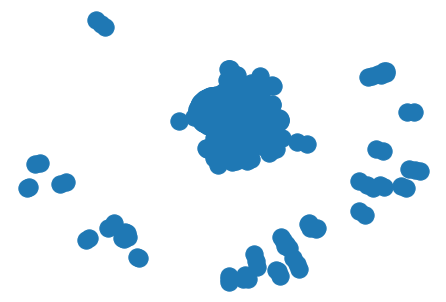

In [43]:

cor_graph=pybel_tools.summary.get_correlation_graph(pybel_graph)

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#cor_graph_pd (convert to pandas pd?)
#Gp=nx.from_pandas_edgelist(cor_graph_pd, source='text_y', target='text_x', edge_attr=True, create_using = nx.MultiDiGraph)

#draw graph 
nx.draw(cor_graph, with_labels=False)
plt.draw()


## Explore Nodes



### Explore Entities

In [55]:
pybel_entities=pybel.struct.summary.node_summary.iterate_entities(pybel_graph)

entities_list=[]
for entity in pybel_entities:
    entities_list.append(entity)

# intilize a null list 
unique_ent_list = [] 

# traverse for all elements 
for x in entities_list: 
    # check if exists in unique_list or not 
    if x not in unique_ent_list: 
        unique_ent_list.append(x)


print(len(entities_list)) # 4149
print(len(unique_ent_list)) # 2236 unique entities

4149
2236


In [56]:
# explore entities
entities_list[0:5] 

[{'namespace': 'chebi', 'name': 'zafirlukast', 'identifier': '10100'},
 {'namespace': 'chebi', 'name': 'diltiazem', 'identifier': '101278'},
 {'namespace': 'chebi', 'name': 'aloxistatin', 'identifier': '101381'},
 {'namespace': 'chebi', 'name': 'erlotinib', 'identifier': '114785'},
 {'namespace': 'chebi', 'name': 'efavirenz', 'identifier': '119486'}]